# LeNet Lab Solution
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
from tensorflow.examples.tutorials.mnist import input_data


mnist = input_data.read_data_sets("MNIST_data/" , reshape=False)
x_train, y_train   =  mnist.train.images, mnist.train.labels
x_validation , y_validation = mnist.validation.images, mnist.validation.labels

x_test, y_test     = mnist.test.images , mnist.test.labels
assert(len(x_train) == len(y_train)) 
assert(len(x_validation) == len(y_validation))
assert(len(x_test) == len(y_test))


print()

print(x_train[0].shape)
print("Training Set:   {} samples".format(len(x_train)))
print("Validation Set: {} samples".format(len(x_validation)))
print("Test Set:       {} samples".format(len(x_test)))

W1110 14:21:59.128036  9632 deprecation.py:323] From <ipython-input-1-fb7a147d8b5e>:4: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W1110 14:21:59.131040  9632 deprecation.py:323] From C:\Users\abhishek buragohaibn\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W1110 14:21:59.142004  9632 deprecation.py:323] From C:\Users\abhishek buragohaibn\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be 

Extracting MNIST_data/train-images-idx3-ubyte.gz


W1110 14:21:59.772707  9632 deprecation.py:323] From C:\Users\abhishek buragohaibn\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


W1110 14:22:00.006002  9632 deprecation.py:323] From C:\Users\abhishek buragohaibn\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.



(28, 28, 1)
Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


In [2]:
import numpy as np
##padding with zeros 
## the input to lenet is 32 32 C
## the images are of 28 28 1
x_train = np.pad(x_train , ((0,0),(2,2),(2,2),(0,0)) , 'constant')
x_validation = np.pad(x_validation ,((0,0),(2,2),(2,2),(0,0)) , 'constant' )
x_test       = np.pad(x_test , ((0,0),(2,2),(2,2),(0,0)) , 'constant')

print(x_train[0].shape)
print(x_validation[0].shape)
print(x_test[0].shape)

(32, 32, 1)
(32, 32, 1)
(32, 32, 1)


Visualize Data
View a sample from the dataset.

You do not need to modify this section.

(32, 32)
0


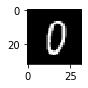

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0 , len(x_train))
image = x_train[index].squeeze()
print(image.shape)
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

Preprocess Data
Shuffle the training data.

You do not need to modify this section.

In [4]:
from sklearn.utils import shuffle

x_train , y_train = shuffle(x_train , y_train)

Setup TensorFlow
The EPOCH and BATCH_SIZE values affect the training speed and model accuracy.

You do not need to modify this section.

In [34]:
import tensorflow as tf

epochs = 10
BATCH_SIZE  = 128


Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

Architecture
Layer 1: Convolutional. The output shape should be 28x28x6.

Activation. Your choice of activation function.

Pooling. The output shape should be 14x14x6.

Layer 2: Convolutional. The output shape should be 10x10x16.

Activation. Your choice of activation function.

Pooling. The output shape should be 5x5x16.

Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.

Layer 3: Fully Connected. This should have 120 outputs.

Activation. Your choice of activation function.

Layer 4: Fully Connected. This should have 84 outputs.

Activation. Your choice of activation function.

Layer 5: Fully Connected (Logits). This should have 10 outputs.

In [35]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf


def LeNet(x):
    
    mu = 0
    sigma = 0.1
    
    
    #----layer 1---------#
    #32 32 1
    conv1_W = tf.Variable(tf.truncated_normal(shape = (5 ,5 ,1 , 6),
                                             mean =mu,
                                             stddev = sigma ))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x , conv1_W , 
                           strides=[1,1,1,1], 
                           padding ='VALID' ) + conv1_b
    
    #28 28 6
    #Activaiton 
    conv1 =tf.nn.relu(conv1)
    
    #Maxpooling layer
    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1] , 
                           strides =[1,2,2,1],
                           padding = 'VALID')
    #14 14 6
    
    
    #-------LAYER 2------#
    
    
    conv2_W =tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16) , 
                         mean = mu ,
                         stddev = sigma))
    conv2_b =tf.Variable(tf.zeros(16))
    conv2   =tf.nn.conv2d(conv1 , conv2_W , 
                          strides= [1, 1 ,1 ,1] , padding='VALID') + conv2_b
    
    #10 10 16
    
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2 , ksize = [1,2,2,1],
                              strides = [1,2,2,1],
                              padding = 'VALID' )
    
    #5 5 16
    print(conv2.shape)
    fc0 = flatten(conv2)
    
    #400
    
    fc1_W  = tf.Variable(tf.truncated_normal(shape=(400, 120) ,
                                           mean =mu,
                                           stddev = sigma))
    
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0 , fc1_W) + fc1_b
    
    
    #120
    fc1   = tf.nn.relu(fc1)
    
    #120
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84) ,
                                           mean =mu,
                                           stddev = sigma))
    
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1 , fc2_W) + fc2_b
    
    
    fc2   = tf.nn.relu(fc2)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), 
                                             mean = mu, 
                                             stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(10))
    logits    = tf.matmul(fc2  , fc3_W) + fc3_b
    
     
    return logits    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    


Features and Labels
Train LeNet to classify MNIST data.

x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

You do not need to modify this section.

In [36]:
x = tf.placeholder(tf.float32 , (None , 32,32,1))
y = tf.placeholder(tf.int32 , (None))

one_hot_y  = tf.one_hot(y , 10)



In [37]:
rate  = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y,
                                                       logits = logits)



loss_operation = tf.reduce_mean(cross_entropy)
optimizer       = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)



(?, 5, 5, 16)


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [41]:
correct_prediction = tf.equal(tf.argmax(logits , 1) , tf.argmax(one_hot_y , 1))

accuracy_operation=  tf.reduce_mean(tf.cast(correct_prediction ,tf.float32 ))
saver = tf.train.Saver()


def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy= 0
    sess  = tf.get_default_session()
    
    for offset in range(0, num_examples , BATCH_SIZE):
        
        batch_x , batch_y =  x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



#  Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [42]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    
    print("training..... ")
    
    print()
    for i  in  range(epochs):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(x_validation , y_validation)
        
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, './lenet')
    print("Model saved")

training..... 

EPOCH 1 ...
Validation Accuracy = 0.966

EPOCH 2 ...
Validation Accuracy = 0.979

EPOCH 3 ...
Validation Accuracy = 0.983

EPOCH 4 ...
Validation Accuracy = 0.985

EPOCH 5 ...
Validation Accuracy = 0.988

EPOCH 6 ...
Validation Accuracy = 0.986

EPOCH 7 ...
Validation Accuracy = 0.989

EPOCH 8 ...
Validation Accuracy = 0.985

EPOCH 9 ...
Validation Accuracy = 0.990

EPOCH 10 ...
Validation Accuracy = 0.990

Model saved


In [44]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(x_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.990
